In [1]:
import fsspec
import xarray as xr
import matplotlib.pyplot as plt
import sys
import xbatcher

In [2]:
for config in ['eddy', 'jet']:
    for forcing in ['forcing1', 'forcing2', 'forcing3', 'high_res', 'low_res']:
        ds = xr.open_zarr(fsspec.get_mapper(f'/scratch/zanna/data/pyqg/publication/{config}/{forcing}.zarr'), consolidated=True)

In [52]:
data_forcing=xr.open_zarr(fsspec.get_mapper(f'/scratch/zanna/data/pyqg/publication/eddy/forcing1.zarr'), consolidated=True)

In [55]:
data_forcing

<xarray.Dataset>
Dimensions:            (run: 275, l: 64, k: 33, lev: 2, time: 87, y: 64, x: 64,
                        lev_mid: 1)
Coordinates:
  * k                  (k) float32 0.0 6.283e-06 ... 0.0001948 0.0002011
  * l                  (l) float32 0.0 6.283e-06 ... -1.257e-05 -6.283e-06
  * lev                (lev) int32 1 2
  * lev_mid            (lev_mid) float32 1.5
  * time               (time) float32 0.0 3.6e+06 7.2e+06 ... 3.06e+08 3.096e+08
  * x                  (x) float32 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
  * y                  (y) float32 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
Dimensions without coordinates: run
Data variables: (12/36)
    APEflux            (run, l, k) float32 dask.array<chunksize=(1, 64, 33), meta=np.ndarray>
    APEgen             (run) float32 dask.array<chunksize=(275,), meta=np.ndarray>
    APEgenspec         (run, l, k) float32 dask.array<chunksize=(1, 64, 33), meta=np.ndarray>
    Dissspec           (run, l, k) float32 dask.array<chunksize=(1, 64, 33), meta=np.ndarray>
    EKE                (run, lev) float32 dask.array<chunksize=(1, 2), meta=np.ndarray>
    EKEdiss            (run) float32 dask.array<chunksize=(275,), meta=np.ndarray>
    ...                 ...
    uv_subgrid_flux    (run, time, lev, y, x) float32 dask.array<chunksize=(1, 87, 2, 64, 64), meta=np.ndarray>
    v                  (run, time, lev, y, x) float32 dask.array<chunksize=(1, 87, 2, 64, 64), meta=np.ndarray>
    v_subgrid_forcing  (run, time, lev, y, x) float32 dask.array<chunksize=(1, 87, 2, 64, 64), meta=np.ndarray>
    vfull              (run, time, lev, y, x) float32 dask.array<chunksize=(1, 87, 2, 64, 64), meta=np.ndarray>
    vq_subgrid_flux    (run, time, lev, y, x) float32 dask.array<chunksize=(1, 87, 2, 64, 64), meta=np.ndarray>
    vv_subgrid_flux    (run, time, lev, y, x) float32 dask.array<chunksize=(1, 87, 2, 64, 64), meta=np.ndarray>
Attributes: (12/26)
    hires:           256
    lores:           64
    pyqg:L:          1000000.0
    pyqg:M:          4096
    pyqg:W:          1000000.0
    pyqg:beta:       1.5e-11
    ...              ...
    pyqg:tc:         0
    pyqg:tmax:       311040000.0
    pyqg:twrite:     1000.0
    pyqg_params:     {"nx": 64, "dt": 3600.0, "tmax": 311040000.0, "tavestart...
    reference:       https://pyqg.readthedocs.io/en/latest/index.html
    title:           Subgrid forcing dataset generated by coarsening nx=256 p...

In [53]:
df=data_lr.q.isel(lev=1)
df=df.stack(snapshot=("run","time"))

In [48]:
data_lr=xr.open_zarr(fsspec.get_mapper(f'/scratch/zanna/data/pyqg/publication/eddy/low_res.zarr'), consolidated=True)

In [49]:
## First subset xarray along dims we care about
dq=data_lr.q.isel(lev=1)
dq=dq.stack(snapshot=("run","time"))

In [51]:
dq

<xarray.DataArray 'q' (y: 64, x: 64, snapshot: 435)>
dask.array<reshape, shape=(64, 64, 435), dtype=float32, chunksize=(64, 64, 87), chunktype=numpy.ndarray>
Coordinates:
    lev       int32 2
  * x         (x) float32 7.812e+03 2.344e+04 3.906e+04 ... 9.766e+05 9.922e+05
  * y         (y) float32 7.812e+03 2.344e+04 3.906e+04 ... 9.766e+05 9.922e+05
  * snapshot  (snapshot) object MultiIndex
  * run       (snapshot) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 4 4 4 4 4 4 4 4 4 4 4
  * time      (snapshot) float32 0.0 3.6e+06 7.2e+06 ... 3.06e+08 3.096e+08
Attributes:
    long_name:  potential vorticity in real space
    units:      s^-1

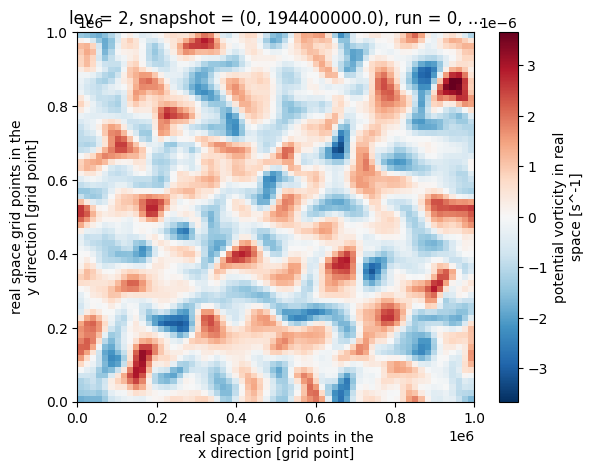

In [54]:
df.isel(snapshot=54).plot()

In [41]:
bgen = xbatcher.BatchGenerator(dq, {'snapshot':64})

In [43]:
for batch in bgen:
    print("oi")
    pass
batch

oi
oi
oi
oi
oi
oi


<xarray.Dataset>
Dimensions:   (snapshot: 64, sample: 4096)
Coordinates:
    lev       int32 2
  * snapshot  (snapshot) object MultiIndex
  * run       (snapshot) int64 3 3 3 3 3 3 3 3 3 3 3 3 ... 4 4 4 4 4 4 4 4 4 4 4
  * time      (snapshot) float32 2.124e+08 2.16e+08 ... 1.224e+08 1.26e+08
  * sample    (sample) object MultiIndex
  * x         (sample) float32 7.812e+03 7.812e+03 ... 9.922e+05 9.922e+05
  * y         (sample) float32 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
Data variables:
    q         (sample, snapshot) float32 3.248e-07 1.265e-07 ... 5.393e-07

In [19]:
next(iter(bgen))

<xarray.Dataset>
Dimensions:  (time: 50, sample: 4096)
Coordinates:
    lev      int32 2
  * time     (time) float32 0.0 3.6e+06 7.2e+06 ... 1.728e+08 1.764e+08
  * sample   (sample) object MultiIndex
  * x        (sample) float32 7.812e+03 7.812e+03 ... 9.922e+05 9.922e+05
  * y        (sample) float32 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
Data variables:
    q        (sample, time) float32 0.0 -3.965e-10 ... -2.553e-07 -7.707e-08

In [44]:
type(batch)

xarray.core.dataset.Dataset

In [ ]:
ds.plot.scatter(x="time",y="APEflux")

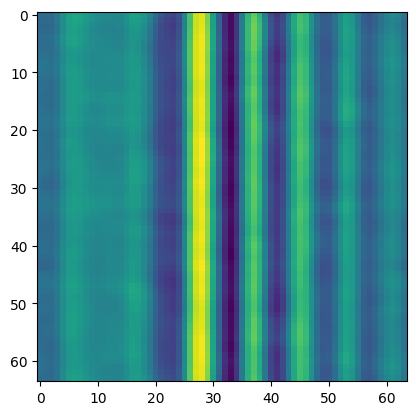

In [40]:
plt.imshow(dq.isel(snapshot=90))

In [ ]:
sys.getsizeof(ds)